In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import analyze as a
import matplotlib.pyplot as plt
import numpy as np
import paper_plots as pp
import sweep_analyze as sa

In [3]:
f, t, l = a.get_ftl(0)
tsouth = a.get_ftl(0, 'sweep', '-24.0', return_fl=False)

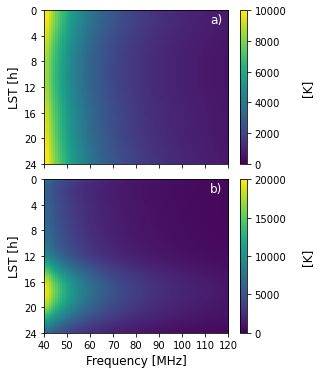

In [4]:
fig, axs = a.plot_temp_3d(f, l, t, tsouth, figsize=(4,16/6))

In [5]:
fig.savefig('plots/paper_figs/temp3d.pdf', bbox_inches='tight')

In [6]:
largell = np.load('sweep/rms_large_ll.npy')
largeep = np.load('sweep/rms_large_ep.npy')
smallll = np.load('sweep/rms_small_ll.npy')
smallep = np.load('sweep/rms_small_ep.npy')
gpll = np.load('sweep/rms_gp_ll.npy')
gpep = np.load('sweep/rms_gp_ep.npy')

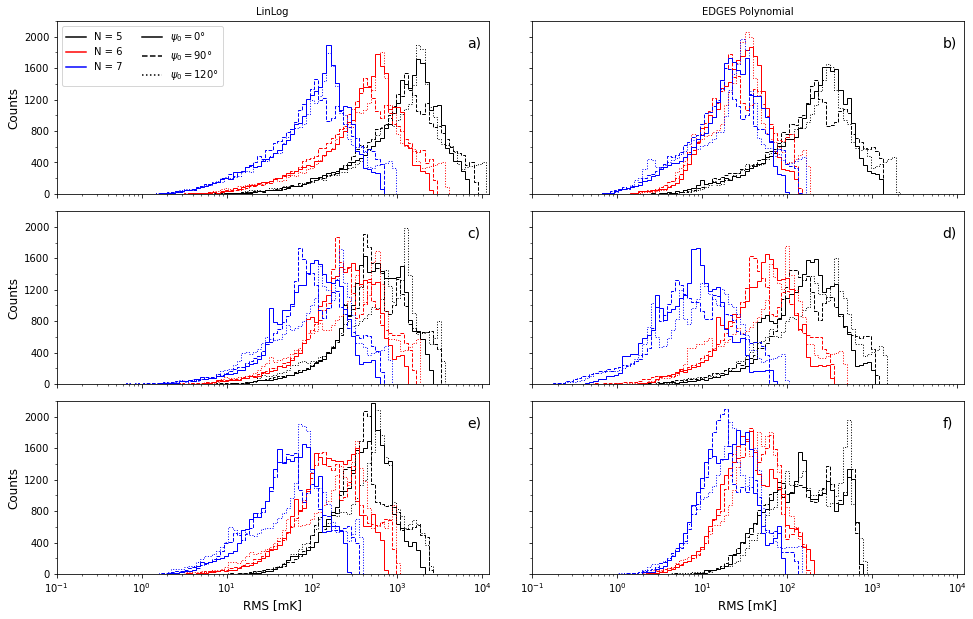

In [15]:
fig, axs = pp.histogram(largell, largeep, smallll, smallep, gpll, gpep)

In [16]:
fig.savefig('plots/paper_figs/histogram.pdf', bbox_inches='tight')

In [17]:
rms_arr_list = np.load('sweep/sweep_rms.npy')

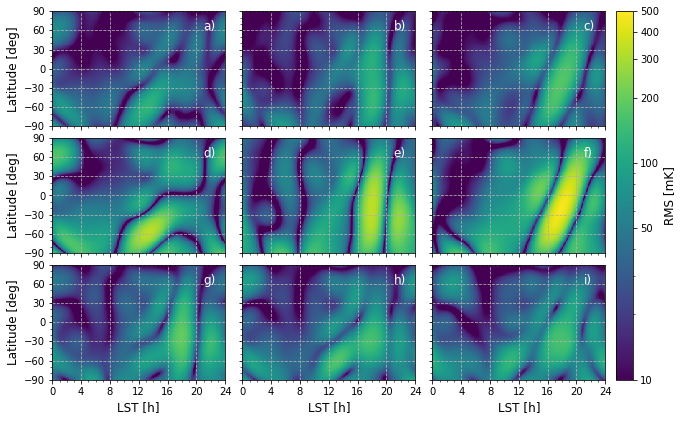

In [37]:
fig, axs = sa.subplot(rms_arr_list, (3,2))

In [38]:
fig.savefig('plots/paper_figs/rms_sweep.pdf', bbox_inches='tight')

In [39]:
rms_n = np.load('rms_snapshots_MARS.npy')

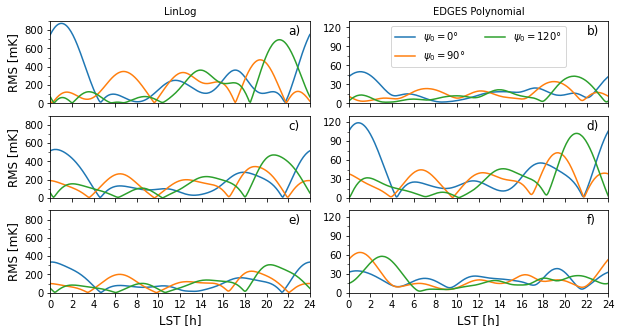

In [43]:
fig, axs = pp.plot_rms(rms_n, (10,5))

In [44]:
fig.savefig('plots/paper_figs/rms_mars.pdf', bbox_inches='tight')

In [45]:
rms_s = np.load('rms_snapshots_south.npy')

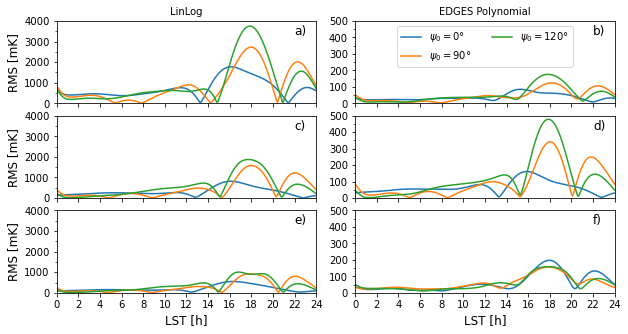

In [48]:
fig, axs = pp.plot_rms(rms_s, (10,5), north=False)

In [49]:
fig.savefig('plots/paper_figs/rms_south.pdf', bbox_inches='tight')

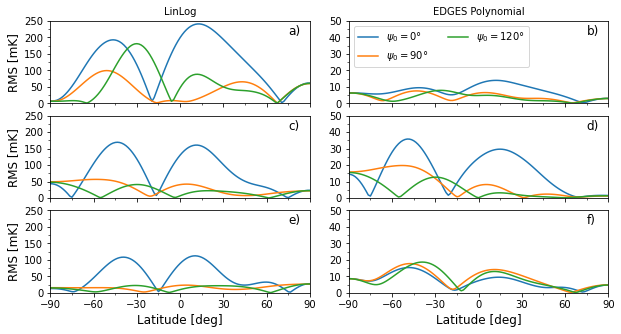

In [50]:
fig, axs = sa.rmsvslat()

In [51]:
fig.savefig('plots/paper_figs/rms_vs_lat.pdf', bbox_inches='tight')

In [52]:
rms_arr_super_MARS = np.load('lst2d_mars.npy')

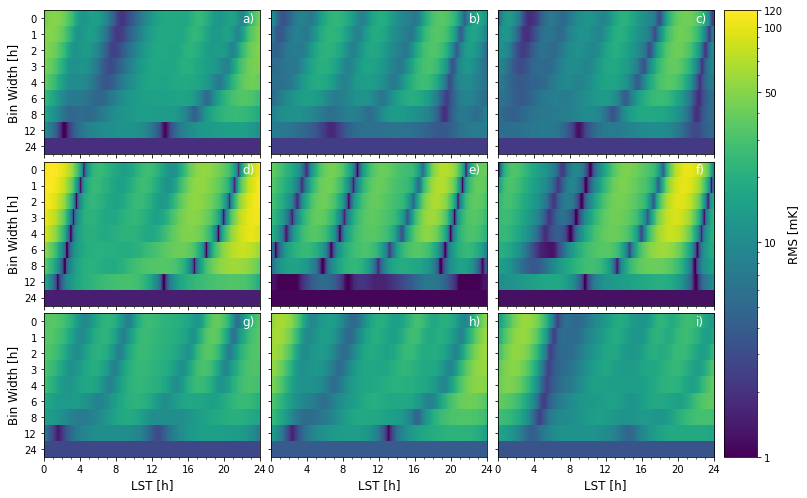

In [64]:
fig, axs = a.subplot_LSTbins(rms_arr_super_MARS, 1, 120)

In [65]:
fig.savefig('plots/paper_figs/lstbin_mars.pdf', bbox_inches='tight')

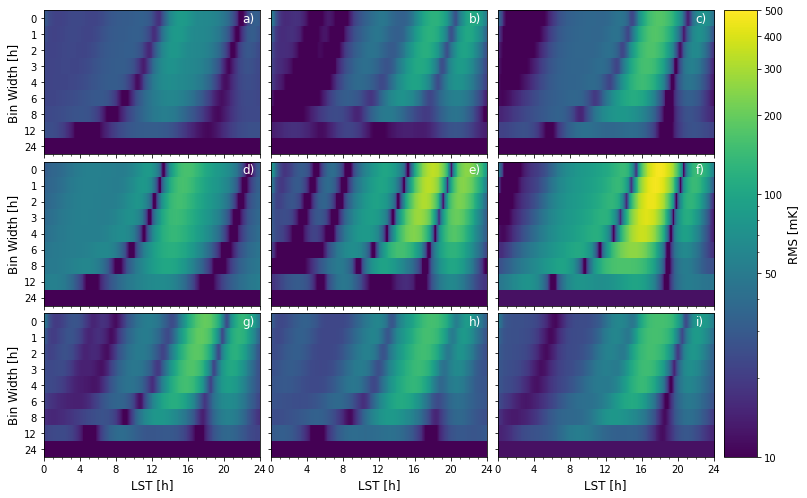

In [83]:
fig, axs = a.subplot_LSTbins(rms_arr_super_south, 10, 500)

In [84]:
fig.savefig('plots/paper_figs/lstbin_south.pdf', bbox_inches='tight')

In [234]:
gauss40 = np.empty((3, 2, 201, 201))
gauss80 = np.empty((3, 2, 201, 201))
gauss120 = np.empty((3, 2, 201, 201))
edges = np.empty((3, 2, 121, 201))

In [248]:
f, t, l = a.get_ftl(0, loc='sweep', sweep_lat=79.5, ground_plane=True, simulation='mini_MIST')
tmean = np.mean(t, axis=0)

In [249]:
all_arr = [gauss40, gauss80, gauss120, edges]
centres = [40, 80, 120]
for i, arr in enumerate(all_arr):
    print(i)
    if i < 3:
        ratio, ref = a.gaussian_rms(f, tmean, centre=centres[i])
    else:
        ratio, ref = a.EDGES_rms(f, tmean)
    arr[2, 0] = ratio

0
1
2
3


In [254]:
np.save('edges_ratios.npy', edges)

In [268]:
np.nanmax(gauss120)

64.32719455646397

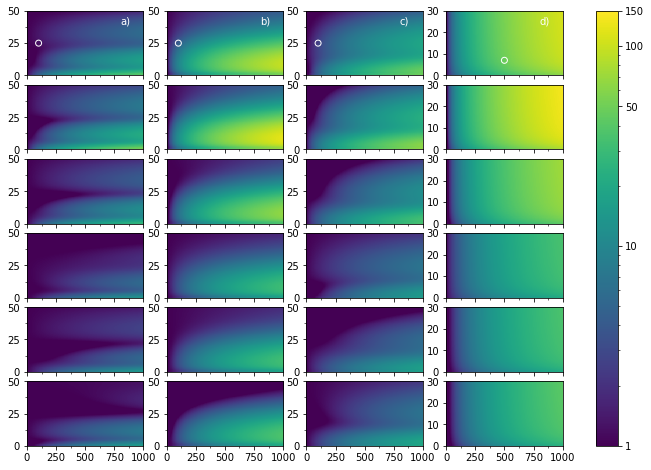

In [276]:
fig, axs = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges)

In [277]:
fig.savefig('plots/paper_figs/mock_signal_ratios.pdf', bbox_inches='tight')